Crimes Visualization 

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [12]:
# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [8]:
df = pd.read_csv("CrimesViz/crime.csv", encoding = "ISO-8859-1") #set variabel dari data yang dibaca

In [26]:
df.sample(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
205687,I162064934,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,A1,84,NaN,2016-08-12 15:03:00,2016,8,Friday,15,Part Three,N BENNET CT,42.365411,-71.054699,"(42.36541097, -71.05469867)"
262941,I162003363,3160,Fire Related Reports,"FIRE REPORT - CAR, BRUSH, ETC.",B3,432,NaN,2016-01-13 08:42:00,2016,1,Wednesday,8,Part Three,JONES AVE,42.286051,-71.084631,"(42.28605107, -71.08463081)"
65910,I182000392,3201,Property Lost,PROPERTY - LOST,C11,357,NaN,2018-01-02 14:52:00,2018,1,Tuesday,14,Part Three,GREENBRIER ST,42.298618,-71.071193,"(42.29861820, -71.07119281)"
119440,I172051052,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,A1,92,NaN,2017-06-25 16:39:00,2017,6,Sunday,16,Part One,COURT ST,42.359033,-71.058801,"(42.35903323, -71.05880143)"
172814,I162100291,2007,Restraining Order Violations,VIOL. OF RESTRAINING ORDER W NO ARREST,C11,385,NaN,2016-12-08 20:19:00,2016,12,Thursday,20,Part Two,HALLET ST,42.280767,-71.047365,"(42.28076737, -71.04736497)"


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
INCIDENT_NUMBER        319073 non-null object
OFFENSE_CODE           319073 non-null int64
OFFENSE_CODE_GROUP     319073 non-null object
OFFENSE_DESCRIPTION    319073 non-null object
DISTRICT               317308 non-null object
REPORTING_AREA         319073 non-null object
SHOOTING               1019 non-null object
OCCURRED_ON_DATE       319073 non-null object
YEAR                   319073 non-null int64
MONTH                  319073 non-null int64
DAY_OF_WEEK            319073 non-null object
HOUR                   319073 non-null int64
UCR_PART               318983 non-null object
STREET                 308202 non-null object
Lat                    299074 non-null float64
Long                   299074 non-null float64
Location               319073 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 41.4+ MB


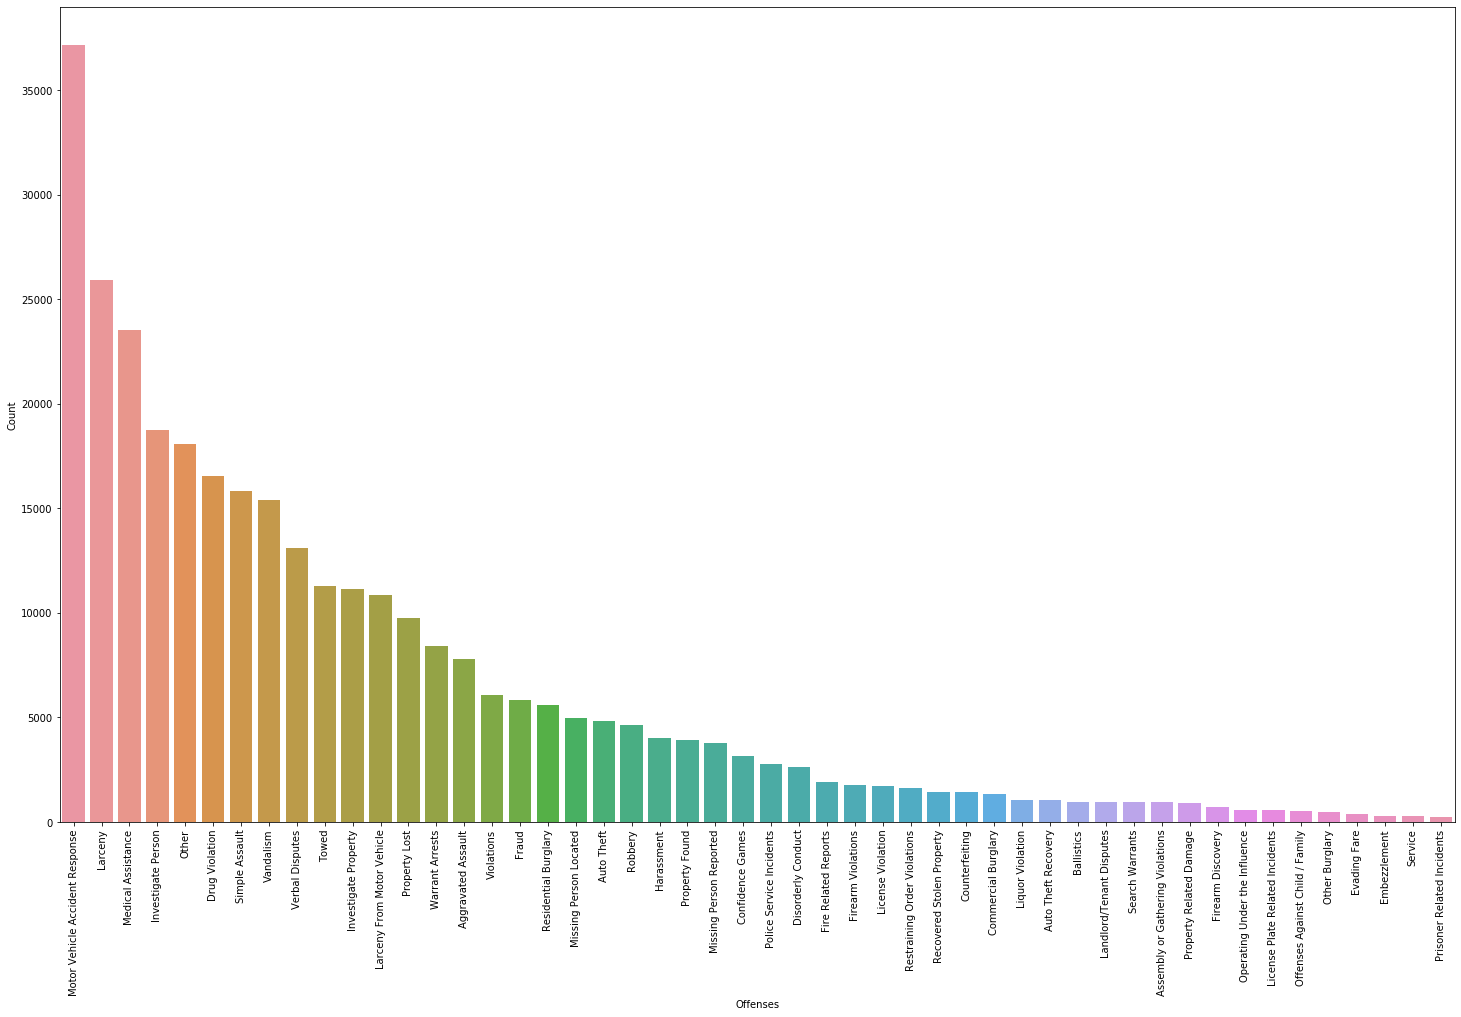

In [13]:
df2 = pd.DataFrame(columns = ['Offenses'])
df2["Offenses"]=[each for each in df.OFFENSE_CODE_GROUP.unique()]
df2["Count"]=[len(df[df.OFFENSE_CODE_GROUP==each]) for each in df2.Offenses]
df2=df2.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df2.Offenses.head(50), y=df2.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Offenses')
plt.ylabel('Count')
plt.show()

In [19]:
labels = df.DAY_OF_WEEK.unique()
values=[]
for each in labels:
    values.append(len(df[df.DAY_OF_WEEK==each]))

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

In [20]:
fig = px.scatter_mapbox(df[df["OFFENSE_CODE_GROUP"]=="Service"], lat="Lat", lon="Long", hover_name="HOUR", hover_data=["YEAR", "HOUR"],
                        color_discrete_sequence=["red"], zoom=10, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [28]:
fig = px.scatter_mapbox(df[df["OFFENSE_CODE_GROUP"]=="Service"], lat="Lat", lon="Long", hover_name="HOUR", hover_data=["YEAR", "HOUR"],
                        color_discrete_sequence=["red"], zoom=10, height=600)

In [30]:
fig.show()